# Fundamentos procesamiento de imágenes<a class="tocSkip">
## TRATAMIENTO DE SEÑALES <a class="tocSkip">
### Ingenieria Electrónica <a class="tocSkip">
### Universidad Popular del Cesar <a class="tocSkip">
### Prof.: Jose Ramón Iglesias Gamarra - [https://github.com/joseramoniglesias/](https://github.com/joseramoniglesias/) <a class="tocSkip">
  **joseiglesias@unicesar.edu.co**


![Imagen](https://www.nibcode.com/images/contents/1135/primary.png)

## Introducción:

A grandes rasgos el procesamiento de imágenes digitales es el conjunto de técnicas que se aplican a las imágenes digitales con el objetivo de mejorar la calidad o facilitar la obtención de información de estas.

### Imagenes digitales:

Una imagen digital es una representación bidimensional de una imagen a partir de una matriz numérica, frecuentemente en binario (unos y ceros) la cual podemos definir como una función f(x, y) donde x, y son las coordenadas espaciales, y el valor de f en cualquier (x,y) representa la intensidad de la imagen en dicho punto.
Una imagen en blanco y negro se puede representar con unos y ceros, asignando 1 al color blanco y 0 al color negro. Si queremos que nuestra imagen varíe entre tonos de grises podemos representar la imagen en escala de grises como matriz, la escala más utilizada es entre 0(negro) y 255(blanco).

## Uso de Python para el procesamiento de imágenes:

Existen varios programas adaptados para el procesamiento de imágenes como Wolfram Mathematica, Matlab y Python. Como bien es sabido Python es de los leguajes más usados actualmente ya que es fácil de aprender y amigable a la hora de programar, además viene con muchas pero muchas librerías dedicadas a la interacción con imágenes y es por estas razones que las usaremos:

Para esta primera parte del curso solo necesitaremos descargar dos librerías:

* Matplotlib: contiene funciones que permiten la generación de gráficos a partir de datos contenidos en listas o arrays(tipo de lista).

* NumPy: contiene funciones matemáticas que sirven para operar con vectores y/o matrices.

Si aún no las has descargado puedes hacerlo ejecutando los siguientes códigos en el terminal:

In [ ]:
pip3 install matplotlib
pip3 install numpy

# Primeros pasos

Comencemos creando una imagen, imaginemos que tenemos una hoja cuadrada con una línea negra a la mitad, podemos representar esto como una matriz de 3x3 con la segunda columna compuesta de ceros y el resto por unos:

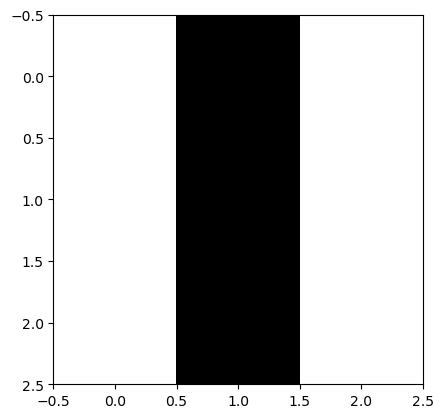

In [1]:
# importamos las librerias
import matplotlib.pyplot as plt
import numpy as np

matriz = [[1, 0, 1],
          [1, 0, 1],
          [1, 0, 1]]

#establecemos que la imagen a crear estara en tono de grices
plt.rcParams['image.cmap'] = 'gray'

# pasamos la matris a un array
imagen_negra = np.array(matriz)

# creamos la imagen y la mostramos, vmin y vmax establece los valores de la escala
plt.imshow(imagen_negra,vmin=0,vmax=1) 
plt.show()

Ahora tratemos de hacer un efecto de difuminado entre las línea blancas y la negra. Para lograr esto es evidente que necesitaremos una mayor escala de grises y una matriz de mayor tamaño, además de una función que modele la intensidad de lo tonos de la imagen con respecto a la línea central:

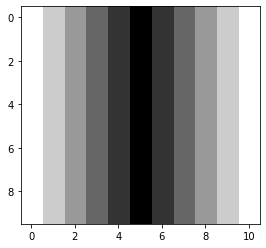

In [3]:
# naturalmente tendremos 4 variables importantes: la posición en el eje x 
                                                # de la posición linea horizontal(pos_x),
                                                # la escala de tonos de la imagen 
                                                # y finalmente el ancho y alto.
def imagen_difuminada(pos_x, escala, ancho, alto):
    # creamos una lista que representara la matriz de la imagen y otra para cada fila de esta
    imagen_total = []
    imagen_linea = []
    for y in range(alto):
        for x in range(ancho):
            # calculamos la distancia horizontal entre la linea y un punto de la imagen
            delta_x = (abs(x - pos_x))
            # usamos la diferencia para determinar la escala de tonos en ese punto
            if delta_x < escala:
                imagen_linea.append(delta_x)

            else:
                imagen_linea.append(escala)

        imagen_total.append(imagen_linea)
        imagen_linea = []
    # pasamos la lista a un array y la retornamos
    imagen = np.array(imagen_total)
    
    return imagen
# establecemos la escala de la grafica y la mostramos
def mostrar_imagen(imagen, escala):
    plt.imshow(imagen,vmin = 0, vmax = escala)
    plt.show()


imagen = imagen_difuminada(5, 5, 11, 10)
mostrar_imagen(imagen, 5)

Para este punto te habrás dado cuenta que cada espacio dentro de la matriz representa un píxel y que su número representa la intensidad de luz que emite cada uno.
Volviendo al ejercicio anterior, podrás notar que la difuminación no es perfecta, ya que aún hay mucho constaste entre un tono y otro, podemos solucionar esto aumentando la escala de tonos de la imagen y aumentando el numero de pixeles por unidad de área:

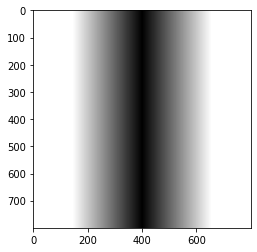

In [4]:
# aplicando la escala clasica de 0 a 255
imagen_difu = imagen_difuminada(400, 255, 800, 800)
mostrar_imagen(imagen_difu, 255)

siguiendo el procedimiento vemos que la calidad de la imagen mejora considerablemente lo que nos lleva a un punto importante, la resolución, posiblemente hayas escuchado el termino si alguna vez trataron de venderte una cámara o algo así, la resolución, en términos de una imagen, se refiere a la cantidad de pixeles contenidos en una pulgada (2,54 cm), actualmente la resolución promedio de un computador es de 1024 x 768 píxeles pero se a llegado a llegado a resoluciones de hasta  2560 x 1600 píxeles lo que es simplemente increíble si pensamos que la retina humana promedio puede discernir hasta los 530 x 530 píxeles por pulgada (y ni hablar de los que usan lentes).

### Ejercicios:
Escribe un codigo en python que dibuje una imagen con:

* un circulo
* un anillo 
* un anillo difuminado 


## Graficas

Es importante representar los datos propios de las imágenes a fin de obtener la mayor cantidad de información de ellas, una de las grafica importante es la del muestreo espacial en tonos de grises que corresponde a un grafico 3D lo que puede implementar mediante el siguiente código:

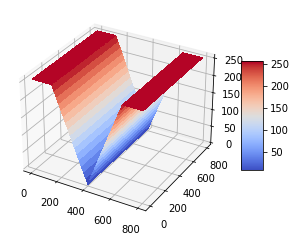

In [5]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

def muestreo_espacial(imagen, escala):
    # con esto creamos una fugura 3D a la que le daremos valores en cada eje 
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    
    # esto establezera las matrizes de valores para los eje x e y
    X = np.arange(0, len(imagen[0]), 1)
    Y = np.arange(0, len(imagen), 1)
    X, Y = np.meshgrid(X, Y)
    
    # aqui definiremos la matriz ce eje z como la que representara los valores de la matriz imagen.
    Z = imagen

    # plot_surface establecera la superficie de la grafica.
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

    # definimos los limites del eje z.
    ax.set_zlim(0, 255)

    # y finalmente agregaremos una barra de colores.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()
# usando el ejemplo anterior
muestreo_espacial(imagen_difu, 255) 

# Imagenes a Color
Para crear una imagen es necesario que un píxel tenga a su disposición una gama de colores que puedan variar en intensidad, así como los colores primarios: rojo, azul y amarillo pueden mezclarse entre si para dar vida a todo los demás colares un píxel puede variar la intensidad de sus pigmentos para hacer lo mismo. Una imágenes multicolor dependerán del sistema de color utilizado y entre todos los sistemas el mas utilizado es el RGB(red, green and Blue). Con esto en mente ahora deberemos de considerar que cada píxel será representado como un vector tridimensional (r, g, b) donde r, g y b serán números enteros entre  0 a 255.

![Imagen](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSgWpa9actlEsf5LjQRa7OfzfKmxg21vHFOVA&usqp=CAU)

## Trabajar con imagenes 
Hasta el momento hemos visto como crear imágenes simples en blanco y negro pero ¿Que ocurre si queremos trabajar con imágenes ya existentes que esta a color? Para esto esta la librería PIL que posee funciones con las que se puede interactuar con las imágenes a nivel píxel.

Comencemos viendo unas funciones básicas:

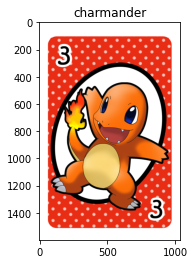

Dimensiones de la imagen:

ancho: 1035, alto: 1600

valores RGB del pixel en (0,0):

255 255 255


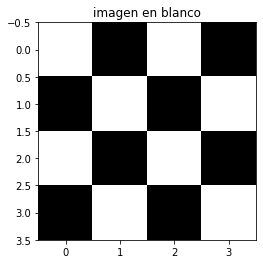

In [6]:
from PIL import Image

imagen = Image.open('charmander.png') # con este codigo abrimos una imagen para trabajar con ella
array_imagen = np.array(imagen)

plt.imshow(array_imagen) # vmin y vmax NO son necesarios si la imagen es a color
plt.title("charmander")
plt.show()

x = imagen.size[0] #retorla el numero de pixeles en el eje x
y = imagen.size[1] #retorla el numero de pixeles en el eje y

print("Dimensiones de la imagen:\n")
print(f"ancho: {x}, alto: {y}\n")

r, g, b = imagen.getpixel((0,0)) # retorna el vector RGB en la pocición (i,j)
print("valores RGB del pixel en (0,0):\n")
print(r, g, b)

new_imagen = Image.new('RGB', (4, 4)) # crea una nueva imagen del tipo RGB de dimenciones i, j

plt.figure()
plt.title("imagen en blanco")

pixel = (255, 255,255)

for y in range(4):
      for x in range(4):
            new_imagen.putpixel((x,y), pixel) # estableze los parametros de un 
                                              # pixel (r, g,b) en la pocicion i,j
            if x != 3:
                
                if pixel ==(0, 0 ,0):
                    pixel = (255, 255,255)
                
                else:
                    pixel = (0, 0 ,0)
        
new_array_imagen = np.array(new_imagen)
plt.imshow(new_array_imagen)
plt.show()

new_imagen.save('new_imagen.png') # guarda una imagen con el nombre dado

También existe la librería skimage que al igual que PIL permite trabajar con imágenes de forma matricial aunque con una estética distinta. A diferencia de PHIL esta debe ser descargada, si deseas usarla puedes hacerlo ejecutando el siguiente código en tu terminal:

In [ ]:
pip3 install scikit-image

He aqui unas funcianes básicas:

Dimensiones de la imagen:



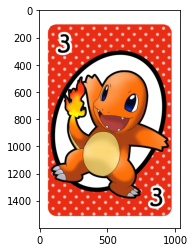

[255 255 255]
Dimensiones de la imagen:

ancho: 1035, alto: 1600



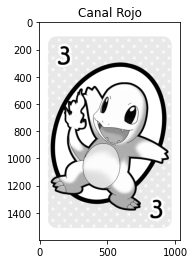

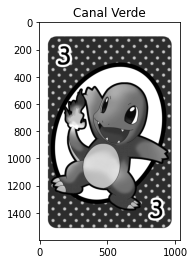

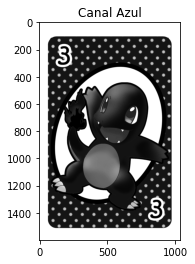

In [7]:
from skimage import io

imagen = io.imread("charmander.png") # retorna una matriz en forma de lista de listas 
                                     # compuesta por cada pixel con cada uno de ellos 
                                     # representado como una lista [R, G, B]
print("Dimensiones de la imagen:\n")    
plt.imshow(imagen)
plt.show()
print(imagen[0][0])
  
dimenciones = imagen.shape # .shape retorna una tupla con las dimenciones de los ejes y e x
                           
print("Dimensiones de la imagen:\n")
print(f"ancho: {dimenciones[1]}, alto: {dimenciones[0]}\n")

#una ventaja de esta bibloteca es que permite obtener los canales de colores que conforman 
# la imagen de forma rapida
plt.imshow(imagen[:,:,0])
plt.title("Canal Rojo")
plt.show()

plt.figure()
plt.imshow(imagen[:,:,1])
plt.title("Canal Verde")
plt.show()

plt.figure()
plt.imshow(imagen[:,:,2])
plt.title("Canal Azul")
plt.show()

io.imsave("new_charmander.png", imagen) # guarda una imagen bajo en nombre seleccionado

Si prestas atención por un lado notaras que el canal azul es el mas oscuro, debido a que es el color que aporta menos información a la imagen, y que el canal rojo es el que más claro, al ser el color predominante, por otro lado notaras que el canal verde también aporta bastante información y esto se debe a que la combinación de colores entre el rojo y verde da como resultado el color amarillo (revisar el píxel de arriba) el cual también es un color muy presente en la imagen.

De manera similar a la anterior es posible llevar a cero las intensidades de los otros colores ( algo así como apagar ciertos "focos" de cada píxel):

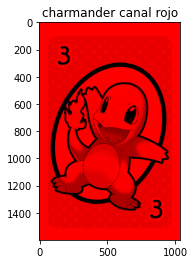

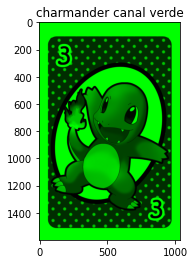

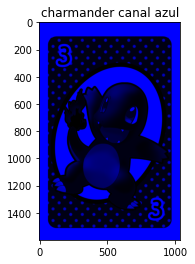

In [52]:
charmander_red = np.copy(imagen) # creo una copia de la imagen para preservar la original
charmander_red[:,:,1]=0
charmander_red[:,:,2]=0
plt.title("canal rojo")
plt.imshow(charmander_red)

plt.figure()
charmander_green = np.copy(imagen) # creo una copia de la imagen para preservar la original
charmander_green[:,:,0]=0
charmander_green[:,:,2]=0
plt.title("canal verde")
plt.imshow(charmander_green)

plt.figure()
charmander_blue = np.copy(imagen) # creo una copia de la imagen para preservar la original
charmander_blue[:,:,0]=0
charmander_blue[:,:,1]=0
plt.title("canal azul")
plt.imshow(charmander_blue)

## Pasar una imagen a color a escala de grises:

Si bien se sabe que una imagen a color aporta más información que una imagen en blanco y negro habrán veces que tal vez solo queramos evaluar una imagen por el contraste de sus colores o simplemente queramos simplificar la matriz en la que trabajaremos a fin de agilizar un algoritmo. Para llevar acabo esta transformación uno podría pensar que si la combinación de los tres colores RGB da como resultado blanco y la ausencia de los 3 da como resultado negro entonces el promedio de las intensidades Daria como resultado el promedio de justo: 

(R + G + B)/3 = Intensidad en escala de grises

Esta correlación podría parecer lógica pero no es del todo correcta, la realidad es que cada color del RGB tiene un equivalencia en la escala de grises, aproximadamente la equivalencia es la siguiente:

                     Rojo 29,9%, Verde 58,7% y Azul 11,4%
                     
De esta forma la intensidad se puede representar con la siguiente ecuación:

                     intensidad_gris = R * 0.299 + G * 0.587 + B * 0.114

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: charmander_white_and_black.png is a low contrast image
Lossy conversion from int64 to uint8. Range [0, 255]. Convert image to uint8 prior to saving to suppress this warning.


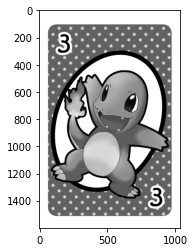

In [8]:
def escala_de_grises(ruta):
    #Abrimos la Imagen
    im = Image.open(ruta)
    #Obtenemos sus dimensiones
    x = im.size[0]
    y = im.size[1]
    #Creamos una nueva imagen con las dimensiones de la imagen anterior
    im2 = Image.new('RGB', (x, y))
   
    lista_j = []
    while len(lista_j) < y:
        lista_i = []
        while len(lista_i) < x:
            #Obtenemos el valor RGB de cada pixel
            r, g, b = im.getpixel((len(lista_i),len(lista_j)))
            #Obtenemos su equivalente en la escala de gris
            p = (r * 0.299 + g * 0.587 + b * 0.114)
            #Ese valor lo convertimos a entero
            gris = int(p)
            #En la nueva imagen en la posición i, j agregamos el nuevo color
            lista_i.append(gris)
        lista_j.append(lista_i)
    imagen = np.array(lista_j)
    
    return imagen

char_w_and_b =  escala_de_grises("charmander.png")
io.imsave("charmander_white_and_black.png", char_w_and_b)
mostrar_imagen(char_w_and_b, 255)

# ¿Que librería ocupar?

En general tanto skimage como Image sirven para lo mismo en lo que respecta a trabajar con una imagen, la principal diferencia es cada una posee funciones con fines diferentes. Por ejemplo Image, a diferencia de skimage, posee funciones para escribir sobre imágenes. También suele suceder que no se puede abrir una imagen usando Image pero sí con skimage o que no es posible guardar una imagen usando skimage pero sí con Image.

## Recomendación:

Lo más sugeridle es aprender a usar ambas, las funciones esenciales y mecanismos de cada librería son muy parecidas entre si por lo que al aprender a usar una función de una librería automáticamente aprenderás que hacen la contraparte de función de la otra

## Fuenetes:
* https://www.nibcode.com/es/blog/1135/algebra-lineal-y-el-procesamiento-digital-de-imagenes-parte-I
* https://www.unioviedo.es/galiano/master/lab01_introduccion_imagen_py.html
* https://es.wikipedia.org/wiki/Procesamiento_digital_de_imágenes
* https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
* https://wizardprogrammer.blogspot.com/2019/03/convertir-imagen-blanco-y-negro-python.html

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT).